Double_layer_neural_network

content :
1) Importing library

2) Unziping file and making it in a readable format

3) Visualising data

4) Implmenting double layer neural network

5) Ploting error v/s iteration curve

6) Calculating accuracy on training and testing data
    training-data= 93.33905586240776
    testing_data(activation=sigmoid)= 93.57689362930182
    testing_data(activation=softmax)= 78.5

    

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gzip
import struct

In [339]:
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte' %kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte' %kind)
    
    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack(">II",lbpath.read(8))
        labels=np.fromfile(lbpath,dtype=np.uint8)
    
    with open(images_path,'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images=np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images, labels



In [340]:
X_train, Y_train = load_mnist('/home/sachin/Desktop/assignment_4/', kind='train')
X_train.shape
Y_train.shape

(60000,)

In [341]:
X_test, Y_test = load_mnist('/home/sachin/Desktop/assignment_4/', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]
#print(m_train)
print(m_test)

10000


In [342]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(Y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


[2732, 43567, 42613, 52416, 45891, 21243, 30403, 32103, 41993]


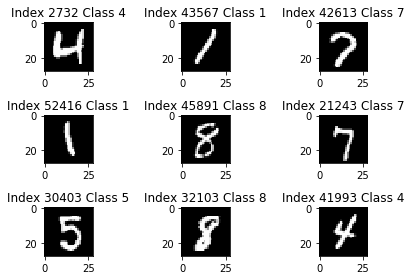

In [343]:
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
print(indices)
for i in range(len(indices)):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray',interpolation='none' )
    plt.title("Index {} Class {}".format(indices[i], Y_train[indices[i]]))
    plt.tight_layout()


In [344]:
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = Y_train[mask]

mask = list(range(m_train))
X_train = X_train[mask]
y_train = Y_train[mask]

mask = list(range(m_test))
X_test = X_test[mask]
y_test = Y_test[mask]

In [345]:
X_val.reshape(1000,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [375]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (59000, 784)
y_train shape: (59000,)
X_val shape: (1000, 784)
y_val shape: (1000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 59000
Number of validation examples: m_validation = 1000
Number of testing examples: m_test = 10000


In [376]:
input_layer_size= 784
hiden_layer_size= 50
output_layer_size=10

In [521]:
def softmax(inputs):
    
    return np.exp(inputs) / (np.sum(np.exp(inputs),axis=0))

def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

 

In [522]:
    
w1= np.random.randn(hiden_layer_size,input_layer_size+1)
w1.shape
w2=np.random.randn(output_layer_size,hiden_layer_size+1)
x_new = np.concatenate((np.ones((len(X_train),1)),X_train),axis=1)
x_new.shape

#print(len(z3))
delta_output=np.zeros((10,51))
delta_hidden=np.zeros((51,785))

# one_hot_encoding

In [523]:
iters=100
alpha=0.1
errors=[]

for i in range (iters):
    # input layer with concatenating one(for bias term)
    a1 = x_new #(59000,785)
    z2 = x_new.dot(w1.T)#(59000,50)
    # hidden layer(values)
    a2 = sigmoid(z2)

    # concatenating one for biasing
    a2_new = np.concatenate((np.ones((len(a2),1)),a2),axis=1)#(59000,51)

    # outpout layer
    z3  = a2_new.dot(w2.T)#(59000,10)
    a3  = sigmoid(z3)#(59000,10)
        
    # error in output layer    
    error_output = a3 -one_hot  #(59000,10)

    # error in hidden layer
    err = error_output*sigmoid_derivative(a3) 
    error_layer_1 = np.dot(err,w2)#(59000,51)

    # delta value for output layer
    delta_output += (error_output.T).dot(a2_new)#(10,51)
    #print(delta_output.shape)

    # delta value for hinden layer
    delta_hidden += (error_layer_1.T).dot(a1)#(51,785)
    del_hidden = delta_hidden[1:,:]#(51,785)

    # gradient descendent for input and output value
    dw2 = delta_output/a1.shape[0]
    dw1 = del_hidden/a1.shape[0]

    # updating weight
    w2  = w2-alpha*dw2#(10,51)
    #print(w2.shape)
    w1  = w1-alpha*dw1#(50,785)
    
    error = np.mean(np.abs(error_output))
    errors.append(error)
    accuracy = (1-error)*100
    
    
    
print(a3)   

/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[[2.17551196e-02 1.72868111e-10 6.23683011e-05 ... 2.06725134e-03
  4.06491820e-05 1.09127270e-03]
 [9.99954514e-01 9.40519886e-11 4.67857922e-04 ... 1.54407147e-04
  3.34309721e-04 3.50916568e-04]
 [3.70018968e-05 1.24463036e-06 2.17627947e-02 ... 1.41201124e-03
  2.76847691e-02 2.07200577e-02]
 ...
 [4.14680966e-06 2.01528319e-06 3.85617456e-03 ... 1.75967269e-05
  4.68674660e-07 1.80532829e-05]
 [1.83583553e-02 1.58969100e-07 4.52347929e-02 ... 8.55981702e-06
  3.10333225e-04 4.03406379e-03]
 [6.42248769e-06 6.75252333e-15 2.88586762e-06 ... 1.74366011e-04
  9.23864037e-04 2.82637225e-02]]


In [524]:

print(accuracy)


93.33905586240776


Text(0.5, 1.0, 'errors v/s iterations')

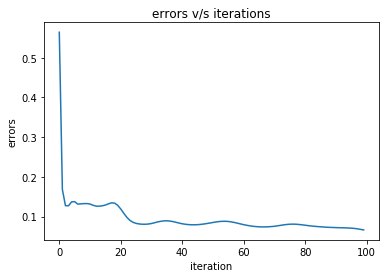

In [525]:
plt.plot(np.arange(100),errors)
plt.xlabel("iteration")
plt.ylabel("errors")
plt.title("errors v/s iterations")

# Predicting on test data

In [526]:


x_test = np.concatenate((np.ones((len(X_test),1)),X_test),axis=1)
z2_test = x_test.dot(w1.T) 
a2_test = sigmoid(z2_test)

a2_new = np.concatenate((np.ones((len(a2_test),1)),a2_test),axis=1)
a2_new.shape
z3_test = a2_new.dot(w2.T)

a3_test = sigmoid(z3_test)
#test=softmax(z3_test)
print(a3_test)

a3_test.shape
    
print(a3_test.shape)

    


[[7.46135532e-09 5.84817231e-21 2.97989373e-08 ... 9.82876175e-01
  1.62510372e-11 4.08451944e-04]
 [1.50124783e-03 2.20549061e-10 1.07644672e-01 ... 4.33258906e-07
  8.27840112e-11 1.50915441e-08]
 [2.96365702e-24 1.86377388e-03 1.82160414e-09 ... 1.32521886e-04
  5.15699425e-28 6.98674248e-15]
 ...
 [1.99749275e-08 1.53239473e-11 1.17331302e-05 ... 3.50606055e-06
  4.28858162e-03 3.24135072e-03]
 [3.97771963e-03 7.30508733e-04 1.16796920e-02 ... 4.37116230e-05
  3.11357979e-01 3.00755354e-03]
 [2.41566528e-05 5.43297056e-08 1.52525497e-02 ... 1.79130609e-06
  7.57367309e-09 4.33251150e-07]]
(10000, 10)


/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [527]:
y_hot   =np.eye(10)[y_test]
error_test = np.mean(np.abs(y_hot-a3_test))
accuracy = (1-error_test)*100
print(accuracy)

93.57689362930182


In [528]:
def softmax(inputs):
    
    return np.exp(inputs) / (np.sum(np.exp(inputs),axis=0))
lst1=[]
lst2=[]
for i in range(len(a3_test)):
    prob = softmax(z3_test[i])

    lst1.append(np.sum(prob))
    lst2.append(np.argmax(prob))

In [529]:
lst2

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 4,
 4,
 9,
 0,
 2,
 9,
 0,
 1,
 5,
 7,
 7,
 8,
 4,
 7,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 1,
 3,
 5,
 3,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 2,
 0,
 4,
 1,
 9,
 5,
 7,
 4,
 4,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 1,
 1,
 7,
 3,
 7,
 8,
 7,
 3,
 6,
 2,
 7,
 8,
 4,
 7,
 5,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 5,
 1,
 6,
 9,
 6,
 0,
 5,
 4,
 4,
 4,
 2,
 1,
 5,
 4,
 8,
 3,
 3,
 9,
 7,
 4,
 4,
 4,
 7,
 7,
 5,
 4,
 7,
 6,
 4,
 9,
 7,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 7,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 1,
 9,
 4,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 9,
 4,
 1,
 4,
 4,
 7,
 3,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 2,
 5,
 9,
 2,
 3,
 0,
 1,
 1,
 5,
 0,
 4,
 0,
 4,
 1,
 6,
 4,
 2,
 2,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 9,
 8,
 3,
 9,
 0,
 3,
 4,
 7,
 3,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 7,
 7,
 7,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 4,
 2,
 6,
 2,
 6,
 4,
 1,


In [531]:
sum=0
for i in range(10000):
    if lst2[i]==y_test[i]:
        sum=sum+1
print((sum/10000)*100)        

78.5
